# Pre-requisites for Getting Started with the Workshop

1. Make sure Git is up and running: [Git - Downloads](https://git-scm.com/downloads)

2. Clone the workshop repo here: [Intro 2 ML and DS](git@github.com:mabu-dev/Intro2ML-and-DS.git)

3. Introduction to pip and conda 
  - Get started with [pip](https://pip.pypa.io/en/stable/installing/)
  - How to get started with [Anaconda](https://docs.anaconda.com/anaconda/install/) 
  - But [miniConda](https://docs.conda.io/en/latest/miniconda.html) is preferred

4. Install dependencies

5. Intro to [Jupyter Notebooks](https://jupyter.org/)



# Intro to pandas and EDA


## 1. Dataset
We use open data from [Vulekamali](https://vulekamali.gov.za) - the dataset is [Budgeted and Actual Provincial Expenditure](https://vulekamali.gov.za/datasets/budgeted-and-actual-provincial-expenditure/budgeted-and-actual-provincial-expenditure) 

The most obvious way to import the dataset would be to download the CSV or XLSX file and import it into [pandas](https://pandas.pydata.org/), but we can also use the [API interface](https://github.com/openspending/os-api) via [requests](https://requests.readthedocs.io/en/master/) into pandas. 

In [400]:
# Assumes you've done 'pip install pandas' or pip install -r requirements.txt
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [401]:
data = pd.read_csv("budget-vs-actual-provincial.csv")
data.sample(5)

,budgetphase,department,economicclassification1,economicclassification2,economicclassification3,economicclassification4,economicclassification5,financialyear,functiongroup1,functiongroup2,government,prognumber,programme,value,amountkind
103559,Main appropriation,Human Settlements,NaN,Current payments,Goods and services,Inventory: Food and food supplies,NaN,2015,NaN,NaN,Eastern Cape,1,Administration,0,Total
63564,Main appropriation,Social Development,NaN,Current payments,Goods and services,Operating leases,NaN,2016,NaN,NaN,Eastern Cape,4,Restorative Services,0,Total
11336,Main appropriation,Environmental Affairs and Development Planning,Current,Current payments,Goods and services,Operating leases,Operating leases,2019,Economic development,"Innovation, science and technology",Western Cape,2,"Environmental Policy, Planning And Coordination",47000,Total
4799,Main appropriation,Office of the Premier,Current,Current payments,Goods and services,"Consumable: Stationery,printing and office sup...","Consumable: Stationery,printing and office sup...",2019,General public services,Executive and legislative organs,KwaZulu-Natal,2,Institutional Development,2353000,Total
129096,Main appropriation,Social Development,NaN,Transfers and subsidies,Provinces and municipalities,Municipalities,NaN,2015,NaN,NaN,Western Cape,1,Administration,0,Total


## 2. Explanatory Data Analysis (EDA)
Now we have data into a pandas dataframe, we can use pandas capabilities to explore the data to get a feel of what we're working with.

In [158]:
eda_df = data.copy()

In [159]:
eda_df.shape

(132896, 15)

How many entries do we have per financial year?

In [5]:
eda_df.financialyear.value_counts()

2016    37737
2017    37611
2015    32761
2018    12442
2019    12345
Name: financialyear, dtype: int64

What's the data type information?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132896 entries, 0 to 132895
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   budgetphase              132896 non-null  object
 1   department               132896 non-null  object
 2   economicclassification1  24787 non-null   object
 3   economicclassification2  132896 non-null  object
 4   economicclassification3  131096 non-null  object
 5   economicclassification4  115625 non-null  object
 6   economicclassification5  24915 non-null   object
 7   financialyear            132896 non-null  int64 
 8   functiongroup1           24787 non-null   object
 9   functiongroup2           24787 non-null   object
 10  government               132896 non-null  object
 11  prognumber               132896 non-null  int64 
 12  programme                132896 non-null  object
 13  value                    132896 non-null  int64 
 14  amountkind          

Let's look at the Nulls in our data. There's potentially some columns that have little to no entries which won't matter for our analysis

In [7]:
eda_df.isna().sum()

budgetphase                     0
department                      0
economicclassification1    108109
economicclassification2         0
economicclassification3      1800
economicclassification4     17271
economicclassification5    107981
financialyear                   0
functiongroup1             108109
functiongroup2             108109
government                      0
prognumber                      0
programme                       0
value                           0
amountkind                      0
dtype: int64

A proportion view is always interesting

In [8]:
eda_df.isna().sum()/data.shape[0]

budgetphase                0.000000
department                 0.000000
economicclassification1    0.813486
economicclassification2    0.000000
economicclassification3    0.013544
economicclassification4    0.129959
economicclassification5    0.812523
financialyear              0.000000
functiongroup1             0.813486
functiongroup2             0.813486
government                 0.000000
prognumber                 0.000000
programme                  0.000000
value                      0.000000
amountkind                 0.000000
dtype: float64

Null values are sometimes insightful for EDA so let's keep them for now

In [9]:
eda_df = eda_df.fillna("Not Provided")
eda_df.sample(5)

,budgetphase,department,economicclassification1,economicclassification2,economicclassification3,economicclassification4,economicclassification5,financialyear,functiongroup1,functiongroup2,government,prognumber,programme,value,amountkind
57294,Main appropriation,Rural Environment and Agricultural Development,Not Provided,Payments for financial assets,Not Provided,Not Provided,Not Provided,2017,Not Provided,Not Provided,North West,4,Veterinary Services,0,Total
68152,Main appropriation,Free State Legislature,Not Provided,Current payments,Goods and services,Inventory: Farming supplies,Not Provided,2016,Not Provided,Not Provided,Free State,3,Parliamentary Services,0,Total
59390,Main appropriation,Provincial Treasury,Not Provided,Current payments,Goods and services,Agency and support / outsourced services,Not Provided,2017,Not Provided,Not Provided,Western Cape,1,Administration,0,Total
49753,Main appropriation,Health,Not Provided,Current payments,Goods and services,Fleet services (including government motor tra...,Not Provided,2017,Not Provided,Not Provided,Northern Cape,1,Administration,10229000,Total
887,Main appropriation,Rural Development and Agrarian Reform,Current,Current payments,Goods and services,Fleet services (including government motor tra...,Fleet services (including government motor tra...,2019,Economic development,Agriculture and rural development,Eastern Cape,6,Agricultural Economics Services,112000,Total


Just looking at the data, there's a few questions we learn that we can ask. Knowing what to ask is very important and it's always a frist step of interogating a dataset.
For example, we can ask:
- which provinces spent the most overall?
- which provinces spent the most in which year?
- which provinces spent the most in which year by which department? etc.

Let's use pandas to answer the first question.

In [10]:
eda_df.groupby(["government"]).sum().sort_values(by="value", ascending=False)[["value"]]

,value
government,
KwaZulu-Natal,579021243000
Gauteng,561319617254
Eastern Cape,369492323077
Limpopo,305935325783
Western Cape,296327020000
Mpumalanga,223482280000
North West,194543738000
Free State,165179732030
Northern Cape,80409615621


Or for the second question.

In [11]:
eda_df.groupby(["financialyear", "government"]).sum()

prognumber         value
financialyear government                             
2015          Eastern Cape        14616   64935366000
              Free State          13104   29351238000
              Gauteng              6287   95390675000
              KwaZulu-Natal       13041  101878916000
              Limpopo             12474   52683991000
              Mpumalanga           4158   38678282000
              North West          14679   34195474000
              Northern Cape       13608   14138184000
              Western Cape        16569   52022293000
2016          Eastern Cape        13293   69528379000
              Free State          13104   30804582000
              Gauteng             13167  103365180000
              KwaZulu-Natal       12159  109006041000
              Limpopo             12537   56969434000
              Mpumalanga          14112   41276400000
              North West          14238   36198297000
              Northern Cape       13608   14826284000
              Western Cape        16569   55008631000
2017          Eastern Cape        13293   74396379000
              Free State          13356   32872667000
              Gauteng             12915  108762107000
              KwaZulu-Natal       11970  115170411000
              Limpopo             12285   61407518000
              Mpumalanga          14112   44511905000
              North West          14238   39049304000
              Northern Cape       13608   16039462000
              Western Cape        16569   59356413000
2018          Eastern Cape         4208   78433947077
              Free State           3880   34877227030
              Gauteng              3556  121359156254
              KwaZulu-Natal        4269  122491654000
              Limpopo              3474   65373474783
              Mpumalanga           3765   48107442000
              North West           4708   41072116000
              Northern Cape        4730   17150266621
              Western Cape         5757   62748199000
2019          Eastern Cape         4108   82198252000
              Free State           3788   37274018000
              Gauteng              3624  132442499000
              KwaZulu-Natal        4215  130474221000
              Limpopo              3501   69500908000
              Mpumalanga           3839   50908251000
              North West           4614   44028547000
              Northern Cape        4632   18255419000
              Western Cape         5836   67191484000

All this would look a lot better in a graph - humans are complex visuals beings that find numbers tricky to understand.
- Let's use [seaborn](https://seaborn.pydata.org/index.html) for a visual perspective

Asummes pip install matplotlib seaborn or requirements file
- Potential problems when instaling from VSCode

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

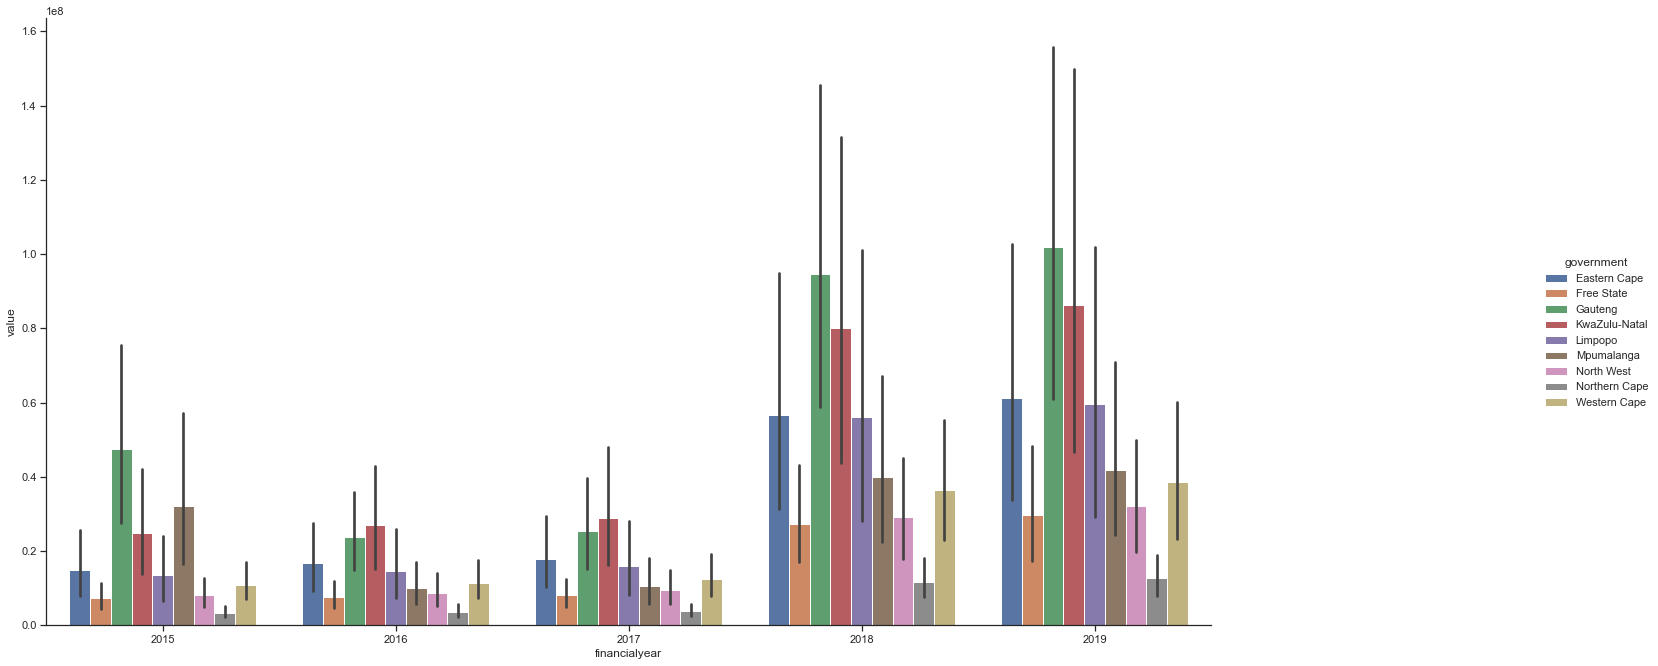

In [32]:
g = sns.catplot(x="financialyear", y="value", hue="government", kind="bar", data=eda_df)
g.fig.set_figwidth(25)
g.fig.set_figheight(10)

We can do a lot more interesting stuff in an "interactive" setup.
Let's Explore [StreamLit](https://www.streamlit.io/)

## 3. Productising interactive EDA solutions with StreamLit
- Assumes pip install -q streamlit or requirements
- StreamLit demo
- Simple intro

# 4. Intro to ML
- ML is a "thing labeller" - 
- X -> Y function mapping

Typical flow:
- Define the ML problem
    - Can we do classification? Yes, we can predict the province name given spent data. [Classification with SKLearn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
    - Can we do regression?
    - Can we do forecasting?
    - Can we do vision?
    - Can we do NLP?

- Design ML flow

- Train -> Test -> Deploy

## 5. When can we use Deep Learning?
- Does the dataset support a deep learning approach?
- Yes! Deep Learning on tabular data for regression and classification.
- Also yes for NLP on tabular data.

Let's build a Transformer model to do question answering on this dataset.

We can do this with [TAPAS](https://huggingface.co/transformers/model_doc/tapas.html) - [a model released by Google](https://www.aclweb.org/anthology/2020.acl-main.398/), using [Hugging Face](https://huggingface.co/) [Transfomers](https://github.com/huggingface/transformers) and [Tensorflow](https://www.tensorflow.org/) or [PyTorch](https://pytorch.org/)

- First we need to prepare the data for our model - a key step in ML
- TAPAS requires semantically sensible column names, so let's start by renaming those

In [361]:
data.sample(3)

,budgetphase,department,economicclassification1,economicclassification2,economicclassification3,economicclassification4,economicclassification5,financialyear,functiongroup1,functiongroup2,government,prognumber,programme,value,amountkind
3956,Main appropriation,Agriculture and Rural Development,Current,Current payments,Goods and services,Operating leases,Operating leases,2019,Economic development,Agriculture and rural development,KwaZulu-Natal,2,Agriculture,4100000,Total
2033,Main appropriation,Human Settlements,Current,Current payments,Goods and services,Entertainment,Entertainment,2019,Community development,Community development,Free State,1,Administration,4000,Total
86996,Main appropriation,Human Settlements,NaN,Current payments,Goods and services,Medsas inventory interface,NaN,2016,NaN,NaN,Mpumalanga,4,Housing Asset Management,0,Total


In [402]:
new_cols = {
    "economicclassification2":"type of payment", 
    "economicclassification3":"type of services",
    "financialyear": "financial year",
    "government":"province",
    "value": "amount"}

In [403]:
tapas_df = data.rename(columns=new_cols)
tapas_df["financial year"] = tapas_df["financial year"].astype(str)
tapas_df = tapas_df.fillna("Not Provided")
tapas_df.sample(3)

,budgetphase,department,economicclassification1,type of payment,type of services,economicclassification4,economicclassification5,financial year,functiongroup1,functiongroup2,province,prognumber,programme,amount,amountkind
2137,Main appropriation,"Police, Roads and Transport",Current,Current payments,Goods and services,Contractors,Contractors,2019,Community development,Community development,Free State,3,Transport Operations,336000,Total
47701,Main appropriation,"Agriculture, Rural Development, Land and Envir...",Not Provided,Transfers and subsidies,Departmental agencies and accounts,Departmental agencies (non-business entities),Not Provided,2017,Not Provided,Not Provided,Mpumalanga,7,Structured Agricultural Education and Training,0,Total
36678,Main appropriation,E-Government,Not Provided,Transfers and subsidies,Foreign governments and international organisa...,Not Provided,Not Provided,2017,Not Provided,Not Provided,Gauteng,2,Information Communication Technology(ICT) Shar...,0,Total


We're working with a [tidy dataset](https://vita.had.co.nz/papers/tidy-data.pdf), but TAPAS requires a flat (or pivot) table 

In [447]:
target_cols = ["department", "financial year", "province", "amount"]
tapas_df_small = tapas_df[target_cols]
target_cols.remove("amount")
tapas_df_small = tapas_df_small.drop_duplicates(subset=target_cols).reset_index(drop=True)
tapas_df_small.sample(5)

,department,financial year,province,amount
549,Education,2015,Limpopo,1073403000
586,"Agriculture, Land Reform and Rural Development",2015,Northern Cape,55485000
570,Economic Development and Tourism,2015,Mpumalanga,53070000
290,Social Development,2017,KwaZulu-Natal,166860000
359,Provincial Parliament,2017,Western Cape,41223000


We take the Top 10 departments

In [448]:
tapas_df_small["department_count"] = tapas_df_small.groupby("department").transform("count")["province"]
tapas_df_small = tapas_df_small.loc[tapas_df_small.department_count >= 10]
tapas_df_small = tapas_df_small.drop("department_count", axis=1)
# tapas_df_small.amount = tapas_df_small.amount.astype(str)
tapas_df_small = tapas_df_small.reset_index(drop=True)
tapas_df_small.sample(5)

,department,financial year,province,amount
33,Provincial Treasury,2019,KwaZulu-Natal,8342000
172,Provincial Treasury,2017,Northern Cape,51161000
298,Provincial Treasury,2015,Northern Cape,44659000
212,Provincial Legislature,2016,KwaZulu-Natal,82346000
175,Office of the Premier,2017,North West,65851000


In [449]:
tapas_df_small["amount"] = tapas_df_small["amount"].astype(int)
tapas_pivot = tapas_df_small.pivot_table(
    "amount", ["province", "financial year"], "department", margins=True, margins_name="total spent", fill_value="0")
# tapas_pivot = tapas_df_small.pivot_table(
#     "amount", ["province", "department"], "financial year", margins=True, margins_name="total spent", fill_value="0")
tapas_pivot = tapas_pivot.reset_index()
tapas_pivot = tapas_pivot.rename_axis(None, axis=1)
tapas_pivot.sample(5)

,province,financial year,Agriculture and Rural Development,Community Safety,Cooperative Governance and Traditional Affairs,Economic Development and Tourism,Education,Health,Human Settlements,Office of the Premier,Provincial Legislature,Provincial Treasury,Social Development,Transport,total spent
33,North West,2018,0,0,0,0,0,2195,0,0,89028,0,528,0,30583667
32,North West,2017,0,0,0,0,0,185321,0,65851,1285,0,117569,0,12431025
35,Northern Cape,2015,0,0,0,30679,331089,97698,0,3633,36186,44659,87405,0,94863714
4,Eastern Cape,2019,0,0,889,0,39709,1063,5316,1415,58267,3285,48213,4708,20400111
8,Free State,2018,0,0,0,0,16917,4238,3418,0,0,2025,10862,0,7492


Import dependencies
- assumes:
    - pip install -q torch torchvision torchaudio
    - pip install -q transformers
    - pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cpu.html 
- or requirements

In [430]:
from transformers import TapasTokenizer, TapasForQuestionAnswering, TapasConfig

google/tapas-base-finetuned-wtq comes from the [HuggingFace Model Hub](https://huggingface.co/models)

In [44]:
model_name = 'google/tapas-base-finetuned-wtq'

In [440]:
%%time
model = TapasForQuestionAnswering.from_pretrained(model_name)

CPU times: user 1.89 s, sys: 390 ms, total: 2.28 s
Wall time: 5.03 s


In [441]:
%%time
tokenizer = TapasTokenizer.from_pretrained(model_name)

CPU times: user 113 ms, sys: 68.1 ms, total: 181 ms
Wall time: 5.01 s


In [442]:
#Helper function for generating answers
def predict(table, queries):
    inputs = tokenizer(table=table, queries=queries, padding='max_length', return_tensors="pt")
    outputs = model(**inputs)
    predicted_answer_coordinates, predicted_aggregation_indices = tokenizer.convert_logits_to_predictions(
        inputs,
        outputs.logits.detach(),
        outputs.logits_aggregation.detach())
    
    # let's print out the results:
    id2aggregation = {0: "NONE", 1: "SUM", 2: "AVERAGE", 3:"COUNT"}
    aggregation_predictions_string = [id2aggregation[x] for x in predicted_aggregation_indices]
    answers = []
    for coordinates in predicted_answer_coordinates:
        if len(coordinates) == 1:
            # only a single cell:
            answers.append(table.iat[coordinates[0]])
        else:
            # multiple cells
            cell_values = []
            for coordinate in coordinates:
                cell_values.append(table.iat[coordinate])
            answers.append(", ".join(cell_values))
    
    return {"queries":queries, "asnwers": answers, "aggregation":aggregation_predictions_string}

In [451]:
df_table = {c:[str(x) for x in tapas_pivot[c].tolist()] for c in tapas_pivot.columns}
# df_table = {c:[str(x) for x in tapas_df_small[c].tolist()] for c in tapas_df_small.columns}
df_table = pd.DataFrame.from_dict(df_table)
df_table.head()

,province,financial year,Agriculture and Rural Development,Community Safety,Cooperative Governance and Traditional Affairs,Economic Development and Tourism,Education,Health,Human Settlements,Office of the Premier,Provincial Legislature,Provincial Treasury,Social Development,Transport,total spent
0,Eastern Cape,2015,0,0,116399000.0,0,1790812000.0,333781000.0,101293000.0,78437000.0,92879000.0,0,0,189277000.0,386125428.5714286
1,Eastern Cape,2016,0,0,130888000.0,0,1945817000.0,393085000.0,89036000.0,128022000.0,93976000.0,83573000.0,236494000.0,202958000.0,367094333.3333333
2,Eastern Cape,2017,0,0,149450000.0,0,2149224000.0,369151000.0,91792000.0,154824000.0,120138000.0,91746000.0,256670000.0,193745000.0,397415555.5555556
3,Eastern Cape,2018,0,0,0,0,37917300.0,1111000.0,6338000.0,0,60647000.0,0,56617000.0,4203708.0,27805668.0
4,Eastern Cape,2019,0,0,8890000.0,0,39709000.0,1063000.0,5316000.0,14150000.0,58267000.0,3285000.0,48213000.0,4708000.0,20400111.111111112


In [452]:
%%time
q1 = "what was the total spent for Mpumalanga in 2019"
response = predict(table=df_table, queries=q1)
response

CPU times: user 19.9 s, sys: 18.4 s, total: 38.4 s
Wall time: 24.9 s


{'queries': 'what was the total spent for Mpumalanga in 2019',
 'asnwers': ['12600125.0'],
 'aggregation': ['AVERAGE']}

In [457]:
%%time
q1 = "how much did Mpumalanga spent on Education in 2019"
response = predict(table=df_table, queries=q1)
response

CPU times: user 24 s, sys: 18.1 s, total: 42.1 s
Wall time: 27.7 s


{'queries': 'how much did Mpumalanga spent on Education in 2019',
 'asnwers': ['4000000.0, 10000000.0'],
 'aggregation': ['NONE']}

In [453]:
df_table.loc[df_table.province == "Mpumalanga"]

,province,financial year,Agriculture and Rural Development,Community Safety,Cooperative Governance and Traditional Affairs,Economic Development and Tourism,Education,Health,Human Settlements,Office of the Premier,Provincial Legislature,Provincial Treasury,Social Development,Transport,total spent
25,Mpumalanga,2015,0,0,0,53070000.0,908588000.0,116544000.0,79593000.0,49482000.0,0,0,140811000.0,0,224681333.33333334
26,Mpumalanga,2016,0,0,0,0,798653000.0,124933000.0,74077000.0,43503000.0,64365000.0,0,128099000.0,0,205605000.0
27,Mpumalanga,2017,0,0,0,51280000.0,852595000.0,132070000.0,81085000.0,47547000.0,70068000.0,0,120906000.0,0,193650142.85714287
28,Mpumalanga,2018,0,0,0,0,4000000.0,2000000.0,1112000.0,0,18257000.0,0,20859000.0,0,9245600.0
29,Mpumalanga,2019,0,0,0,2825000.0,10000000.0,11112000.0,1185000.0,3074000.0,24152000.0,1830000.0,46623000.0,0,12600125.0


# 6. Model Serving and Deployment
- Deploying with [StreamLit](https://www.streamlit.io/gallery)
- Serving (for demo) with [gradio](https://www.gradio.app/)

In [459]:
df_table.to_csv("df_table.csv", index=False)